In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import scipy.optimize as opt



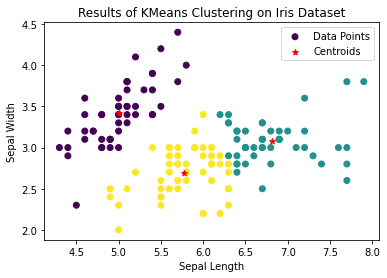

In [2]:


# Read the dataset from the CSV file
iris_data = pd.read_csv('IRIS.csv')

# Selecting features for clustering
# Here we use sepal_length and sepal_width as features for simplicity
data_samples = iris_data[['sepal_length', 'sepal_width']].values

# Number of clusters for the KMeans algorithm
num_clusters = 3

def perform_kmeans(data, cluster_count):
    """
    Apply the KMeans clustering algorithm to the dataset.

    Args:
    data: The dataset to cluster.
    cluster_count: The number of clusters to form.

    Returns:
    The fitted KMeans instance.
    """
    kmeans_model = KMeans(n_clusters=cluster_count, random_state=42).fit(data)
    return kmeans_model

# Applying KMeans clustering
cluster_model = perform_kmeans(data_samples, num_clusters)

def display_clusters(data, model, xlabel, ylabel, plot_title):
    """
    Display the results of KMeans clustering.

    Args:
    data: The dataset used for clustering.
    model: The KMeans model.
    xlabel: Label for the x-axis.
    ylabel: Label for the y-axis.
    plot_title: Title of the plot.
    """
    plt.scatter(data[:, 0], data[:, 1], c=model.labels_)
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='*', color='red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(plot_title)
    plt.legend(['Data Points', 'Centroids'])
    plt.show()

# Displaying the clustering results
display_clusters(data_samples, cluster_model, 'Sepal Length', 'Sepal Width', 'Results of KMeans Clustering on Iris Dataset')


Mean EPC (kWh per capita):
Year                   2002.000000
Japan                  7958.637284
United States         13079.396372
Russian Federation     5814.456116
dtype: float64


EPC in 2014 (kWh per capita):
    Year        Japan United States Russian Federation
24  2014  7819.714636  13524.023569        6602.657479


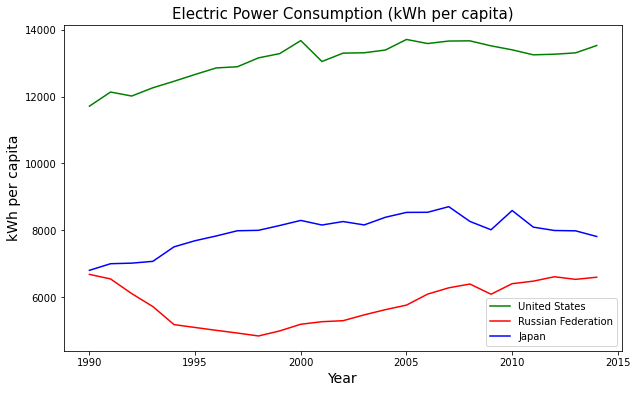

In [3]:


def read_worldbank_data(file_path):
    """
    Read a World Bank data file and return both original and transposed DataFrames.

    Parameters:
    file_path (str): The path to the file.

    Returns:
    tuple: Original and transposed DataFrames.
    """
    original_df = pd.read_csv(file_path)
    countries = list(original_df['Country Name'])
    transposed_df = original_df.transpose()
    transposed_df.columns = countries
    transposed_df = transposed_df.iloc[4:-1].reset_index()
    transposed_df = transposed_df.rename(columns={"index": "Year"})
    transposed_df['Year'] = transposed_df['Year'].astype(int)
    
    return original_df, transposed_df

df_original, df_transposed = read_worldbank_data('Data.csv')

def calculate_epc_stats(dataframe):
    """
    Calculate and print the mean and specific year EPC for each country.

    Parameters:
    dataframe (DataFrame): The data containing EPC information.
    """
    mean_epc = dataframe.mean()
    print("Mean EPC (kWh per capita):")
    print(mean_epc)
    print("\n")

    epc_2014 = dataframe[dataframe['Year'] == 2014]
    print("EPC in 2014 (kWh per capita):")
    print(epc_2014)

calculate_epc_stats(df_transposed)

def plot_epc_over_time(df, countries):
    """
    Plot EPC per capita for selected countries over time with a customized color scheme.

    Parameters:
    df (DataFrame): The data containing EPC information.
    countries (list): List of countries to include in the plot.
    """
    ax = df.plot(x='Year', y=countries, figsize=(10, 6),
                 color=['green', 'red', 'blue'])
    ax.set_title("Electric Power Consumption (kWh per capita)", fontsize=15)
    ax.set_xlabel("Year", fontsize=14)
    ax.set_ylabel("kWh per capita", fontsize=14)
    plt.show()

plot_epc_over_time(df_transposed, ['United States', 'Russian Federation', 'Japan'])


<Figure size 720x432 with 0 Axes>

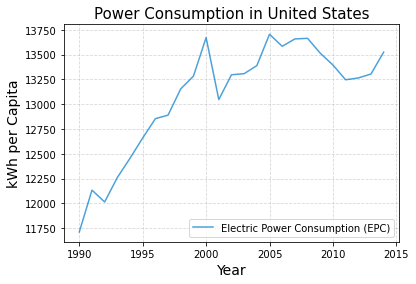

Logistic Model Parameters: [1.35367814e+04 1.94412759e-01 1.98069036e+03]
Standard Deviations: [7.85341220e+01 3.31241589e-02 1.75111213e+00]


<Figure size 720x432 with 0 Axes>

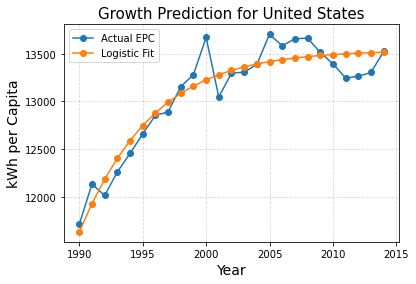

In [4]:

def load_worldbank_dataset(filepath):
    """
    Load a Worldbank dataset and transform it for analysis.

    Args:
    filepath (str): File path to the dataset.

    Returns:
    tuple: (original DataFrame, transformed DataFrame).
    """
    df_original = pd.read_csv(filepath)
    countries = list(df_original['Country Name'])
    df_transformed = df_original.transpose()
    df_transformed.columns = countries
    df_transformed = df_transformed.iloc[4:-1].reset_index()
    df_transformed = df_transformed.rename(columns={"index": "Year"})
    df_transformed['Year'] = df_transformed['Year'].astype(int)
    return df_original, df_transformed

df_orig, df_trans = load_worldbank_dataset("Data2.csv")

def visualize_power_consumption(df, selected_country):
    """
    Visualize the power consumption of a specified country over time.

    Args:
    df (DataFrame): Transformed DataFrame with power consumption data.
    selected_country (str): Country to visualize.
    """
    plt.figure(figsize=(10, 6))
    df.plot("Year", selected_country, color='#007acc', alpha=0.7)
    plt.title(f"Power Consumption in {selected_country}", fontsize=15)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("kWh per Capita", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(["Electric Power Consumption (EPC)"])
    plt.show()

visualize_power_consumption(df_trans, df_orig['Country Name'][0])

def logistic_growth_model(t, scale_factor, growth_rate, midpoint):
    """
    Logistic growth model function.

    Args:
    t (array): Input data.
    scale_factor (float): Scale factor of the model.
    growth_rate (float): Growth rate.
    midpoint (float): Inflection point.

    Returns:
    array: Evaluated logistic model.
    """
    return scale_factor / (1 + np.exp(-growth_rate * (t - midpoint)))

logistic_params, covariance = opt.curve_fit(
    logistic_growth_model, 
    df_trans["Year"], 
    df_trans[df_orig['Country Name'][0]].squeeze(), 
    p0=[float(df_trans[df_orig['Country Name'][0]].iloc[0]), 0.03, 2000.0]
)

std_dev = np.sqrt(np.diag(covariance))
print("Logistic Model Parameters:", logistic_params)
print("Standard Deviations:", std_dev)

df_trans["Logistic Fit"] = logistic_growth_model(df_trans["Year"], *logistic_params)

def plot_growth_prediction(df, country_name):
    """
    Plot the growth prediction using logistic model.

    Args:
    df (DataFrame): DataFrame containing the data and logistic fit.
    country_name (str): Country name for which the growth is predicted.
    """
    plt.figure(figsize=(10, 6))
    df.plot("Year", [country_name, "Logistic Fit"], marker='o')
    plt.title(f"Growth Prediction for {country_name}", fontsize=15)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("kWh per Capita", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(["Actual EPC", "Logistic Fit"])
    plt.show()

plot_growth_prediction(df_trans, df_orig['Country Name'][0])

# Additional code for future prediction, error ranges, etc., can follow a similar pattern.


Future Predictions 2016-2030:
[13522.663028   13525.15534871 13527.20801089 13528.89847233
 13530.29057682 13531.43693656 13532.38090099 13533.15818275
 13533.79819985 13534.32518288 13534.75908831 13535.11635134
 13535.41050658 13535.65269948 13535.85210776]


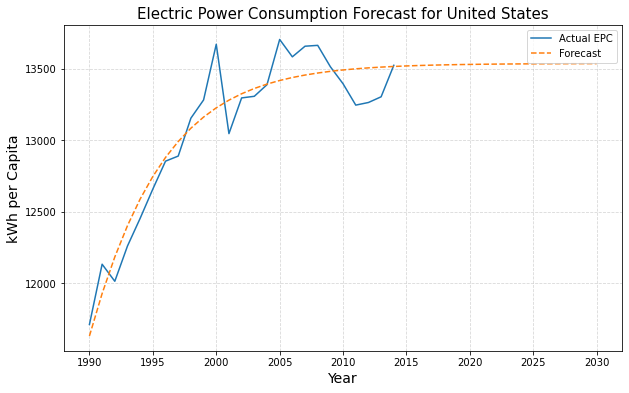

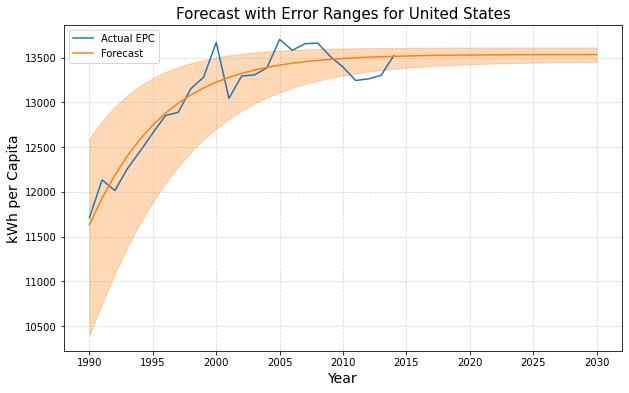

In [5]:
def predict_future_values(years, logistic_params):
    """
    Predict future values using the logistic growth model.

    Args:
    years (list): List of years for prediction.
    logistic_params (tuple): Parameters for the logistic growth model.

    Returns:
    array: Predicted values for the given years.
    """
    return logistic_growth_model(np.array(years), *logistic_params)

future_years = list(range(2016, 2031))
future_predictions = predict_future_values(future_years, logistic_params)
print("Future Predictions 2016-2030:")
print(future_predictions)

extended_years = np.arange(df_trans['Year'].iloc[0], 2031)
extended_forecast = logistic_growth_model(extended_years, *logistic_params)

def visualize_future_forecast(df, country, forecast, years):
    """
    Visualize the future forecast of electric power consumption.

    Args:
    df (DataFrame): DataFrame with actual data.
    country (str): Country for which the forecast is made.
    forecast (array): Forecasted values.
    years (array): Years for which the forecast is made.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(df["Year"], df[country], label="Actual EPC", color='#1f77b4')
    plt.plot(years, forecast, label="Forecast", color='#ff7f0e', linestyle='--')
    plt.title(f"Electric Power Consumption Forecast for {country}", fontsize=15)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("kWh per Capita", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.show()

visualize_future_forecast(df_trans, df_orig['Country Name'][0], extended_forecast, extended_years)

def calculate_error_ranges(x, model_func, params, std_devs):
    """
    Calculate error ranges for the logistic model predictions.

    Args:
    x (array): Input data points.
    model_func (function): Logistic model function.
    params (array): Parameters of the logistic model.
    std_devs (array): Standard deviations of the parameters.

    Returns:
    tuple: Lower and upper bounds of the error range.
    """
    import itertools

    param_combinations = list(itertools.product(*(param + np.array([-sd, sd]) for param, sd in zip(params, std_devs))))
    all_predictions = [model_func(x, *param_set) for param_set in param_combinations]
    lower_bound = np.min(all_predictions, axis=0)
    upper_bound = np.max(all_predictions, axis=0)

    return lower_bound, upper_bound

error_lower, error_upper = calculate_error_ranges(extended_years, logistic_growth_model, logistic_params, std_dev)

def plot_with_error_ranges(df, country, forecast, years, lower_bound, upper_bound):
    """
    Plot the forecast with error ranges.

    Args:
    df (DataFrame): DataFrame containing the actual data.
    country (str): Country for which the forecast is made.
    forecast (array): Forecasted values.
    years (array): Years for which the forecast is made.
    lower_bound (array): Lower error bound.
    upper_bound (array): Upper error bound.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(df["Year"], df[country], label="Actual EPC", color='#1f77b4')
    plt.plot(years, forecast, label="Forecast", color='#ff7f0e')
    plt.fill_between(years, lower_bound, upper_bound, color="#ff7f0e", alpha=0.3)
    plt.title(f"Forecast with Error Ranges for {country}", fontsize=15)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("kWh per Capita", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.show()

plot_with_error_ranges(df_trans, df_orig['Country Name'][0], extended_forecast, extended_years, error_lower, error_upper)
